# Import

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

import matplotlib.pyplot as plt
import seaborn as sns

import time

# Load CSV

In [2]:
features = "features_cleaned.csv"
df = pd.read_csv(features)

In [5]:
X = df

In [7]:
X.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4


# Scaling

In [9]:
features = ['popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 
            'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 
            'liveness', 'valence', 'tempo', 'time_signature']

In [11]:
X = df[features]

In [13]:
scaler = StandardScaler()

In [15]:
X_scaled = scaler.fit_transform(X)

# Clustering

In [24]:
k_range = range(5, 21)

In [26]:
silhouette_scores = []

In [28]:
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)
    print(f"k={k}, Silhouette Score: {score}")

k=5, Silhouette Score: 0.10344818917983759
k=6, Silhouette Score: 0.11373971708973157
k=7, Silhouette Score: 0.11273808086082159
k=8, Silhouette Score: 0.12294570891101744
k=9, Silhouette Score: 0.1294786325332754
k=10, Silhouette Score: 0.11214346018488092
k=11, Silhouette Score: 0.10679773438579496
k=12, Silhouette Score: 0.10716050349517177
k=13, Silhouette Score: 0.1047653973285383
k=14, Silhouette Score: 0.10013525993743394
k=15, Silhouette Score: 0.09419525712584015
k=16, Silhouette Score: 0.09294089495087623
k=17, Silhouette Score: 0.09515400978124942
k=18, Silhouette Score: 0.09733533391475445
k=19, Silhouette Score: 0.09688033886474443
k=20, Silhouette Score: 0.09758332477182098


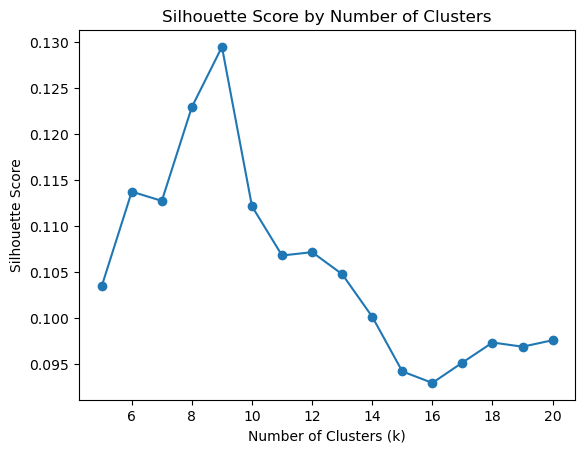

In [41]:
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score by Number of Clusters')
plt.show()

In [43]:
best_k = k_range[np.argmax(silhouette_scores)]
print(f"Best number of clusters: {best_k}")

Best number of clusters: 9


# Calinski-Harabasz Index and Davies-Bouldin Index - Define range of k

In [ ]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    sil_score = silhouette_score(X_scaled, labels)
    ch_score = calinski_harabasz_score(X_scaled, labels)
    db_score = davies_bouldin_score(X_scaled, labels)
    print(f"k={k}, Silhouette: {sil_score}, CH: {ch_score}, DB: {db_score}")

# PCA - Test different n_components

In [25]:
from sklearn.decomposition import PCA

pca = PCA(n_components=7) 
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=9, random_state=42) 
labels = kmeans.fit_predict(X_pca)
score = silhouette_score(X_pca, labels)
print(f"Silhouette Score con PCA (k=9): {score}")

print("Variance explained by component:", pca.explained_variance_ratio_)
print("Total variance explained:", sum(pca.explained_variance_ratio_))

Silhouette Score con PCA (k=9): 0.15649535871359574
Variance explained by component: [0.20129111 0.10349024 0.09432616 0.07985858 0.07006234 0.06841412
 0.0628633 ]
Total variance explained: 0.6803058390986236


# DBSCAN - Test different eps and min_samples

In [17]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # -1 is noise
n_noise = list(labels).count(-1)
print(f"Number of clusters: {n_clusters}, Noise: {n_noise} songs")

Number of clusters: 321, Noise: 86829 songs


# Variances

In [29]:
variances = X.var()
print("Variance of each column:")
print(variances.sort_values())

low_variance_cols = variances[variances < 0.01].index
print("Columns with low variance:", low_variance_cols)

Variance of each column:
speechiness         1.283183e-02
danceability        3.122007e-02
liveness            3.798012e-02
energy              6.584683e-02
valence             6.909724e-02
explicit            7.847900e-02
instrumentalness    1.048784e-01
acousticness        1.144608e-01
time_signature      2.056052e-01
mode                2.312408e-01
key                 1.267297e+01
loudness            2.726425e+01
popularity          4.235628e+02
tempo               9.070729e+02
duration_ms         1.275675e+10
dtype: float64
Columns with low variance: Index([], dtype='object')


In [31]:
X.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4
1,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4
2,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4
3,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3
4,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4


# Test droping columns - 1

In [37]:
selected_cols = ['energy', 'danceability', 'loudness', 'tempo', 'acousticness', 
                 'instrumentalness', 'valence']
X_selected = X[selected_cols]

scaler = StandardScaler()
X_scaled_selected = scaler.fit_transform(X_selected)

kmeans = KMeans(n_clusters=9, random_state=42)
labels = kmeans.fit_predict(X_scaled_selected)
score = silhouette_score(X_scaled_selected, labels)
print(f"Silhouette Score with selected columns (k=9): {score}")

Silhouette Score with selected columns (k=9): 0.1761075815558802


# Correlation

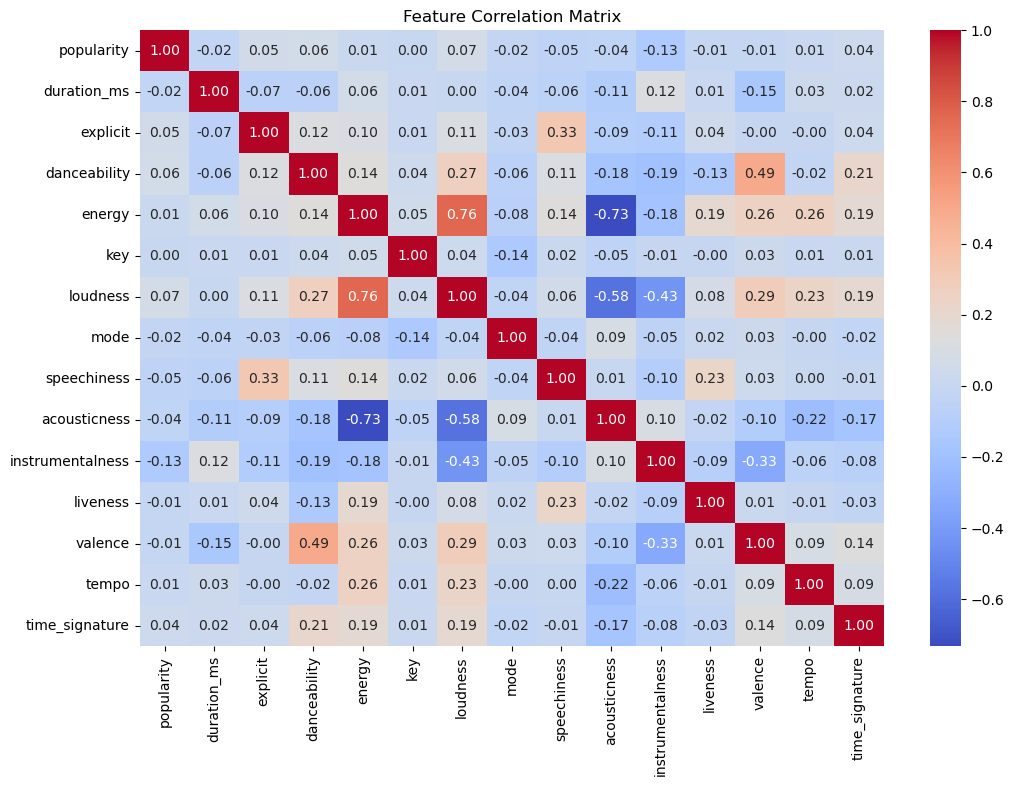

Highly correlated pairs: []


In [47]:
correlation_matrix = X.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Matrix")
plt.show()

high_corr = correlation_matrix.abs() > 0.8
high_corr_pairs = [(i, j) for i in high_corr.columns for j in high_corr.index if high_corr.loc[j, i] and i > j]
print("Highly correlated pairs:", high_corr_pairs)

# Test droping columns - 2

In [51]:
selected_cols = ['energy', 'danceability', 'tempo', 'acousticness', 'instrumentalness', 'valence']
X_selected = X[selected_cols]

scaler = StandardScaler()
X_scaled_selected = scaler.fit_transform(X_selected)

kmeans = KMeans(n_clusters=9, random_state=42)
labels = kmeans.fit_predict(X_scaled_selected)
score = silhouette_score(X_scaled_selected, labels)
print(f"Silhouette Score with 6 selected columns (k=9): {score}")

Silhouette Score with 6 selected columns (k=9): 0.19256070438169248


# Clustering droping columns

In [57]:
k_range = range(5, 16)

silhouette_scores = []
ch_scores = []
db_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled_selected)
    
    sil_score = silhouette_score(X_scaled_selected, labels)
    ch_score = calinski_harabasz_score(X_scaled_selected, labels)
    db_score = davies_bouldin_score(X_scaled_selected, labels)
    
    silhouette_scores.append(sil_score)
    ch_scores.append(ch_score)
    db_scores.append(db_score)
    
    print(f"k={k}:")
    print(f"  Silhouette Score: {sil_score:.4f}")
    print(f"  Calinski-Harabasz Index: {ch_score:.2f}")
    print(f"  Davies-Bouldin Index: {db_score:.4f}")
    print()

best_k_sil = k_range[silhouette_scores.index(max(silhouette_scores))]
best_k_ch = k_range[ch_scores.index(max(ch_scores))]
best_k_db = k_range[db_scores.index(min(db_scores))]

print(f"Best k according to Silhouette: {best_k_sil} (Score: {max(silhouette_scores):.4f})")
print(f"Best k according to Calinski-Harabasz: {best_k_ch} (Score: {max(ch_scores):.2f})")
print(f"Best k according to Davies-Bouldin: {best_k_db} (Score: {min(db_scores):.4f})")

k=5:
  Silhouette Score: 0.2341
  Calinski-Harabasz Index: 24634.43
  Davies-Bouldin Index: 1.3568

k=6:
  Silhouette Score: 0.2174
  Calinski-Harabasz Index: 23299.39
  Davies-Bouldin Index: 1.3367

k=7:
  Silhouette Score: 0.2051
  Calinski-Harabasz Index: 21832.02
  Davies-Bouldin Index: 1.4015

k=8:
  Silhouette Score: 0.1943
  Calinski-Harabasz Index: 20572.22
  Davies-Bouldin Index: 1.3834

k=9:
  Silhouette Score: 0.1926
  Calinski-Harabasz Index: 19383.51
  Davies-Bouldin Index: 1.3795

k=10:
  Silhouette Score: 0.1917
  Calinski-Harabasz Index: 18663.39
  Davies-Bouldin Index: 1.3446

k=11:
  Silhouette Score: 0.1837
  Calinski-Harabasz Index: 17540.55
  Davies-Bouldin Index: 1.3610

k=12:
  Silhouette Score: 0.1870
  Calinski-Harabasz Index: 17472.11
  Davies-Bouldin Index: 1.3744

k=13:
  Silhouette Score: 0.1846
  Calinski-Harabasz Index: 16686.30
  Davies-Bouldin Index: 1.4013

k=14:
  Silhouette Score: 0.1792
  Calinski-Harabasz Index: 15931.48
  Davies-Bouldin Index: 1.4

# Test with 9 columns

In [16]:
selected_cols = ['energy', 'danceability', 'tempo', 'acousticness', 'instrumentalness', 
                 'valence', 'loudness', 'speechiness', 'key']
X_selected = X[selected_cols]

scaler = StandardScaler()
X_scaled_selected = scaler.fit_transform(X_selected)

k_range = range(5, 16)

silhouette_scores = []
ch_scores = []
db_scores = []
execution_times = []

for k in k_range:
    start_time = time.time()  # Start timer
    
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled_selected)
    
    sil_score = silhouette_score(X_scaled_selected, labels)
    ch_score = calinski_harabasz_score(X_scaled_selected, labels)
    db_score = davies_bouldin_score(X_scaled_selected, labels)
    
    end_time = time.time()  # End timer
    execution_time = end_time - start_time  # Time in seconds
    
    silhouette_scores.append(sil_score)
    ch_scores.append(ch_score)
    db_scores.append(db_score)
    execution_times.append(execution_time)
    
    print(f"k={k}:")
    print(f"  Silhouette Score: {sil_score:.4f}")
    print(f"  Calinski-Harabasz Index: {ch_score:.2f}")
    print(f"  Davies-Bouldin Index: {db_score:.4f}")
    print(f"  Execution Time: {execution_time:.2f} seconds")
    print()

best_k_sil = k_range[silhouette_scores.index(max(silhouette_scores))]
best_k_ch = k_range[ch_scores.index(max(ch_scores))]
best_k_db = k_range[db_scores.index(min(db_scores))]

print(f"Best k according to Silhouette: {best_k_sil} (Score: {max(silhouette_scores):.4f})")
print(f"Best k according to Calinski-Harabasz: {best_k_ch} (Score: {max(ch_scores):.2f})")
print(f"Best k according to Davies-Bouldin: {best_k_db} (Score: {min(db_scores):.4f})")
print(f"Execution times: {execution_times}")

k=5:
  Silhouette Score: 0.1640
  Calinski-Harabasz Index: 15956.60
  Davies-Bouldin Index: 1.7461
  Execution Time: 153.65 seconds

k=6:
  Silhouette Score: 0.1739
  Calinski-Harabasz Index: 16375.49
  Davies-Bouldin Index: 1.5684
  Execution Time: 128.95 seconds

k=7:
  Silhouette Score: 0.1649
  Calinski-Harabasz Index: 15675.11
  Davies-Bouldin Index: 1.5228
  Execution Time: 122.70 seconds

k=8:
  Silhouette Score: 0.1569
  Calinski-Harabasz Index: 14689.54
  Davies-Bouldin Index: 1.5464
  Execution Time: 124.81 seconds

k=9:
  Silhouette Score: 0.1565
  Calinski-Harabasz Index: 13623.78
  Davies-Bouldin Index: 1.6054
  Execution Time: 129.18 seconds

k=10:
  Silhouette Score: 0.1579
  Calinski-Harabasz Index: 13126.02
  Davies-Bouldin Index: 1.5711
  Execution Time: 123.20 seconds

k=11:
  Silhouette Score: 0.1579
  Calinski-Harabasz Index: 12448.41
  Davies-Bouldin Index: 1.6092
  Execution Time: 125.28 seconds

k=12:
  Silhouette Score: 0.1506
  Calinski-Harabasz Index: 12026.8

# Test with 10 columns

In [20]:
selected_cols = ['energy', 'danceability', 'tempo', 'acousticness', 'instrumentalness', 
                 'valence', 'loudness', 'speechiness', 'key', 'liveness']
X_selected = X[selected_cols]

scaler = StandardScaler()
X_scaled_selected = scaler.fit_transform(X_selected)

k_range = range(5, 16)

silhouette_scores = []
ch_scores = []
db_scores = []
execution_times = []

for k in k_range:
    start_time = time.time()
    
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled_selected)
    
    sil_score = silhouette_score(X_scaled_selected, labels)
    ch_score = calinski_harabasz_score(X_scaled_selected, labels)
    db_score = davies_bouldin_score(X_scaled_selected, labels)
    
    end_time = time.time()
    execution_time = end_time - start_time
    
    silhouette_scores.append(sil_score)
    ch_scores.append(ch_score)
    db_scores.append(db_score)
    execution_times.append(execution_time)
    
    print(f"k={k}:")
    print(f"  Silhouette Score: {sil_score:.4f}")
    print(f"  Calinski-Harabasz Index: {ch_score:.2f}")
    print(f"  Davies-Bouldin Index: {db_score:.4f}")
    print(f"  Execution Time: {execution_time:.2f} seconds")
    print()

best_k_sil = k_range[silhouette_scores.index(max(silhouette_scores))]
best_k_ch = k_range[ch_scores.index(max(ch_scores))]
best_k_db = k_range[db_scores.index(min(db_scores))]

print(f"Best k according to Silhouette: {best_k_sil} (Score: {max(silhouette_scores):.4f})")
print(f"Best k according to Calinski-Harabasz: {best_k_ch} (Score: {max(ch_scores):.2f})")
print(f"Best k according to Davies-Bouldin: {best_k_db} (Score: {min(db_scores):.4f})")
print(f"Execution times: {execution_times}")

k=5:
  Silhouette Score: 0.1558
  Calinski-Harabasz Index: 13667.50
  Davies-Bouldin Index: 1.8836
  Execution Time: 130.72 seconds

k=6:
  Silhouette Score: 0.1615
  Calinski-Harabasz Index: 13981.39
  Davies-Bouldin Index: 1.6371
  Execution Time: 138.61 seconds

k=7:
  Silhouette Score: 0.1459
  Calinski-Harabasz Index: 13242.72
  Davies-Bouldin Index: 1.6317
  Execution Time: 127.76 seconds

k=8:
  Silhouette Score: 0.1564
  Calinski-Harabasz Index: 13313.95
  Davies-Bouldin Index: 1.5566
  Execution Time: 127.08 seconds

k=9:
  Silhouette Score: 0.1482
  Calinski-Harabasz Index: 12551.41
  Davies-Bouldin Index: 1.5818
  Execution Time: 125.81 seconds

k=10:
  Silhouette Score: 0.1484
  Calinski-Harabasz Index: 12001.12
  Davies-Bouldin Index: 1.5467
  Execution Time: 128.39 seconds

k=11:
  Silhouette Score: 0.1374
  Calinski-Harabasz Index: 11333.36
  Davies-Bouldin Index: 1.5435
  Execution Time: 131.34 seconds

k=12:
  Silhouette Score: 0.1352
  Calinski-Harabasz Index: 10791.7

# 6 Clusters and 9 columns

In [28]:
selected_cols = ['energy', 'danceability', 'tempo', 'acousticness', 'instrumentalness', 
                 'valence', 'loudness', 'speechiness', 'key']
X_selected = X[selected_cols]

scaler = StandardScaler()
X_scaled_selected = scaler.fit_transform(X_selected)

start_time = time.time()

kmeans = KMeans(n_clusters=6, random_state=42)
labels = kmeans.fit_predict(X_scaled_selected)

end_time = time.time()
execution_time = end_time - start_time

sil_score = silhouette_score(X_scaled_selected, labels)
ch_score = calinski_harabasz_score(X_scaled_selected, labels)
db_score = davies_bouldin_score(X_scaled_selected, labels)

print(f"k=6:")
print(f"  Silhouette Score: {sil_score:.4f}")
print(f"  Calinski-Harabasz Index: {ch_score:.2f}")
print(f"  Davies-Bouldin Index: {db_score:.4f}")
print(f"  Execution Time: {execution_time:.2f} seconds")
print()

df['cluster'] = labels

df.to_csv("dataset_with_clusters_k6_9cols.csv", index=False)

cluster_summary = df.groupby('cluster')[selected_cols].agg(['mean', 'std', 'min', 'max'])

cluster_summary.to_csv("cluster_summary_statistics_k6_9cols.csv")
print("Cluster summary statistics saved to 'cluster_summary_statistics_k6_9cols.csv'")

cluster_counts = df['cluster'].value_counts().sort_index()

cluster_counts.to_csv("cluster_counts_k6_9cols.csv")
print("Cluster counts saved to 'cluster_counts_k6_9cols.csv'")

print("Statistics by cluster:")
print(cluster_summary)
print("\nNumber of songs per cluster:")
print(cluster_counts)

k=6:
  Silhouette Score: 0.1739
  Calinski-Harabasz Index: 16375.49
  Davies-Bouldin Index: 1.5684
  Execution Time: 0.13 seconds

Cluster summary statistics saved to 'cluster_summary_statistics_k6_9cols.csv'
Cluster counts saved to 'cluster_counts_k6_9cols.csv'
Statistics by cluster:
           energy                            danceability                    \
             mean       std       min    max         mean       std     min   
cluster                                                                       
0        0.726959  0.145747  0.174000  1.000     0.696207  0.107541  0.2230   
1        0.381284  0.142959  0.000000  0.991     0.523066  0.140725  0.0000   
2        0.816842  0.146169  0.253000  1.000     0.468597  0.125302  0.0588   
3        0.641110  0.200172  0.000071  0.999     0.638837  0.138152  0.1500   
4        0.745800  0.197552  0.084100  1.000     0.578246  0.188822  0.0000   
5        0.177242  0.174417  0.000020  1.000     0.339302  0.185116  0.0000   

  

In [30]:
df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,0
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,1
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,1
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,1
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89735,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,5
89736,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,5
89737,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,1
89738,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,1


In [32]:
cluster_labels = {
    0: "High Energy / Dance Pop",
    1: "Chill Vibes / Acoustic",
    2: "Rock / Upbeat",
    3: "Rap / Hip-Hop",
    4: "Instrumental Rock / Ambient",
    5: "Chill Vibes / Acoustic Instrumental"
}

df['category'] = df['cluster'].map(cluster_labels)

In [34]:
df.to_csv("dataset_with_categories_k6_9cols.csv", index=False)
print("Dataset with categories saved to 'dataset_with_categories_k6_9cols.csv'")

Dataset with categories saved to 'dataset_with_categories_k6_9cols.csv'


# 12 Clusters and 10 columns

In [15]:
selected_cols = ['energy', 'danceability', 'tempo', 'acousticness', 'instrumentalness', 
                 'valence', 'loudness', 'speechiness', 'key', 'liveness']
X_selected = X[selected_cols]

scaler = StandardScaler()
X_scaled_selected = scaler.fit_transform(X_selected)

start_time = time.time()

kmeans = KMeans(n_clusters=12, random_state=42)
labels = kmeans.fit_predict(X_scaled_selected)

end_time = time.time()
execution_time = end_time - start_time

sil_score = silhouette_score(X_scaled_selected, labels)
ch_score = calinski_harabasz_score(X_scaled_selected, labels)
db_score = davies_bouldin_score(X_scaled_selected, labels)

print(f"k=12:")
print(f"  Silhouette Score: {sil_score:.4f}")
print(f"  Calinski-Harabasz Index: {ch_score:.2f}")
print(f"  Davies-Bouldin Index: {db_score:.4f}")
print(f"  Execution Time: {execution_time:.2f} seconds")
print()

df['cluster'] = labels

df.to_csv("dataset_with_clusters_k12_10cols.csv", index=False)

cluster_summary = df.groupby('cluster')[selected_cols].agg(['mean', 'std', 'min', 'max'])

cluster_summary.to_csv("cluster_summary_statistics_k12_10cols.csv")
print("Cluster summary statistics saved to 'cluster_summary_statistics_k12_10cols.csv'")

cluster_counts = df['cluster'].value_counts().sort_index()

cluster_counts.to_csv("cluster_counts_k12_10cols.csv")
print("Cluster counts saved to 'cluster_counts_k12_10cols.csv'")

print("Statistics by cluster:")
print(cluster_summary)
print("\nNumber of songs per cluster:")
print(cluster_counts)

k=12:
  Silhouette Score: 0.1352
  Calinski-Harabasz Index: 10791.72
  Davies-Bouldin Index: 1.6481
  Execution Time: 0.62 seconds

Cluster summary statistics saved to 'cluster_summary_statistics_k12_10cols.csv'
Cluster counts saved to 'cluster_counts_k12_10cols.csv'
Statistics by cluster:
           energy                            danceability                    \
             mean       std       min    max         mean       std     min   
cluster                                                                       
0        0.740187  0.144869  0.204000  0.999     0.682179  0.111504  0.2510   
1        0.754233  0.182600  0.000020  1.000     0.516526  0.150373  0.0000   
2        0.163655  0.158137  0.000020  1.000     0.329320  0.180010  0.0000   
3        0.735422  0.196230  0.084100  1.000     0.598315  0.177210  0.0614   
4        0.698845  0.200784  0.052300  0.995     0.559401  0.088005  0.1970   
5        0.846801  0.145078  0.188000  1.000     0.400270  0.123322  0.0513  

In [20]:
X = df
X = df.drop(columns=['track_id', 'artists', 'album_name', 'track_name', 'popularity', 'duration_ms', 'explicit', 'mode', 'time_signature'])

selected_cols = ['energy', 'danceability', 'tempo', 'acousticness', 'instrumentalness', 
                 'valence', 'loudness', 'speechiness', 'key', 'liveness']
X_selected = X[selected_cols]

scaler = StandardScaler()
X_scaled_selected = scaler.fit_transform(X_selected)

kmeans = KMeans(n_clusters=12, random_state=42)
labels = kmeans.fit_predict(X_scaled_selected)

df['cluster'] = labels

cluster_labels = {
    0: "High Energy / Dance Pop",
    1: "Rock / Live Performance",
    2: "Chill Vibes / Acoustic Instrumental",
    3: "Instrumental Rock / Ambient",
    4: "Rap / Spoken Word (Live)",
    5: "High Energy Rock / Fast-Paced",
    6: "Dance Pop / Feel-Good",
    7: "Rock / Upbeat (Fast)",
    8: "Rock / Melancholic",
    9: "Rap / Hip-Hop (Danceable)",
    10: "Chill Vibes / Acoustic Pop",
    11: "Chill Vibes / Soft Acoustic"
}

df['category'] = df['cluster'].map(cluster_labels)

df.to_csv("dataset_with_categories_k12_10cols.csv", index=False)
print("Dataset with new categories saved to 'dataset_with_categories_k12_10cols.csv'")

Dataset with new categories saved to 'dataset_with_categories_k12_10cols.csv'


# 12 Clusters and 12 columns

In [18]:
selected_cols = ['energy', 'danceability', 'tempo', 'acousticness', 'instrumentalness', 
                 'valence', 'loudness', 'speechiness', 'key', 'liveness','mode','time_signature']

X = df
X_selected = X[selected_cols]

scaler = StandardScaler()
X_scaled_selected = scaler.fit_transform(X_selected)

start_time = time.time()

kmeans = KMeans(n_clusters=12, random_state=42)
labels = kmeans.fit_predict(X_scaled_selected)

end_time = time.time()
execution_time = end_time - start_time

sil_score = silhouette_score(X_scaled_selected, labels)
ch_score = calinski_harabasz_score(X_scaled_selected, labels)
db_score = davies_bouldin_score(X_scaled_selected, labels)

print(f"k=12:")
print(f"  Silhouette Score: {sil_score:.4f}")
print(f"  Calinski-Harabasz Index: {ch_score:.2f}")
print(f"  Davies-Bouldin Index: {db_score:.4f}")
print(f"  Execution Time: {execution_time:.2f} seconds")
print()

df['cluster'] = labels

df.to_csv("dataset_with_clusters_k12_12cols.csv", index=False)

cluster_summary = df.groupby('cluster')[selected_cols].agg(['mean', 'std', 'min', 'max'])

cluster_summary.to_csv("cluster_summary_statistics_k12_12cols.csv")
print("Cluster summary statistics saved to 'cluster_summary_statistics_k12_10cols.csv'")

cluster_counts = df['cluster'].value_counts().sort_index()

cluster_counts.to_csv("cluster_counts_k12_12cols.csv")
print("Cluster counts saved to 'cluster_counts_k12_12cols.csv'")

print("Statistics by cluster:")
print(cluster_summary)
print("\nNumber of songs per cluster:")
print(cluster_counts)

k=12:
  Silhouette Score: 0.1198
  Calinski-Harabasz Index: 8516.10
  Davies-Bouldin Index: 1.8064
  Execution Time: 0.35 seconds

Cluster summary statistics saved to 'cluster_summary_statistics_k12_10cols.csv'
Cluster counts saved to 'cluster_counts_k12_12cols.csv'
Statistics by cluster:
           energy                           danceability                    \
             mean       std      min    max         mean       std     min   
cluster                                                                      
0        0.718967  0.156447  0.15600  1.000     0.671170  0.121708  0.2250   
1        0.306968  0.128426  0.00002  0.842     0.450613  0.129226  0.0548   
2        0.830775  0.145499  0.25300  1.000     0.441372  0.118410  0.0631   
3        0.631492  0.201871  0.04640  0.998     0.698163  0.106275  0.2930   
4        0.677816  0.210709  0.05230  0.995     0.569810  0.099366  0.1970   
5        0.391093  0.326331  0.00000  1.000     0.337401  0.223631  0.0000   
6       

In [16]:
X = df
X = df.drop(columns=['track_id', 'artists', 'album_name', 'track_name', 'popularity', 'duration_ms', 'explicit'])

selected_cols = ['energy', 'danceability', 'tempo', 'acousticness', 'instrumentalness', 
                 'valence', 'loudness', 'speechiness', 'key', 'liveness','mode','time_signature']
X_selected = X[selected_cols]

scaler = StandardScaler()
X_scaled_selected = scaler.fit_transform(X_selected)

kmeans = KMeans(n_clusters=12, random_state=42)
labels = kmeans.fit_predict(X_scaled_selected)

df['cluster'] = labels

cluster_labels = {
    0: "High Energy / Dance Pop",
    1: "Indie/Folk Acoustic",
    2: "Rock/Punk",
    3: "Instrumental Electronic / Ambient",
    4: "Rap / Spoken Word (Live)",
    5: "Ambient / Meditation",
    6: "Live Feel-Good Pop",
    7: "Upbeat Acoustic Pop",
    8: "Classical/Ambient Acoustic",
    9: "Experimental Electronic",
    10: "Alternative Rock",
    11: "Uplifting Dance Pop"
}

df['category'] = df['cluster'].map(cluster_labels)

df.to_csv("dataset_with_categories_k12_12cols.csv", index=False)
print("Dataset with new categories saved to 'dataset_with_categories_k12_12cols.csv'")

Dataset with new categories saved to 'dataset_with_categories_k12_12cols.csv'


# Test with 12 columns

In [8]:
selected_cols = ['energy', 'danceability', 'tempo', 'acousticness', 'instrumentalness', 
                 'valence', 'loudness', 'speechiness', 'key', 'liveness','mode','time_signature']

X = df
X_selected = X[selected_cols]

scaler = StandardScaler()
X_scaled_selected = scaler.fit_transform(X_selected)

k_range = range(5, 21)

silhouette_scores = []
ch_scores = []
db_scores = []
execution_times = []

for k in k_range:
    start_time = time.time()
    
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled_selected)
    
    sil_score = silhouette_score(X_scaled_selected, labels)
    ch_score = calinski_harabasz_score(X_scaled_selected, labels)
    db_score = davies_bouldin_score(X_scaled_selected, labels)
    
    end_time = time.time()
    execution_time = end_time - start_time
    
    silhouette_scores.append(sil_score)
    ch_scores.append(ch_score)
    db_scores.append(db_score)
    execution_times.append(execution_time)
    
    print(f"k={k}:")
    print(f"  Silhouette Score: {sil_score:.4f}")
    print(f"  Calinski-Harabasz Index: {ch_score:.2f}")
    print(f"  Davies-Bouldin Index: {db_score:.4f}")
    print(f"  Execution Time: {execution_time:.2f} seconds")
    print()

best_k_sil = k_range[silhouette_scores.index(max(silhouette_scores))]
best_k_ch = k_range[ch_scores.index(max(ch_scores))]
best_k_db = k_range[db_scores.index(min(db_scores))]

print(f"Best k according to Silhouette: {best_k_sil} (Score: {max(silhouette_scores):.4f})")
print(f"Best k according to Calinski-Harabasz: {best_k_ch} (Score: {max(ch_scores):.2f})")
print(f"Best k according to Davies-Bouldin: {best_k_db} (Score: {min(db_scores):.4f})")
print(f"Execution times: {execution_times}")

k=5:
  Silhouette Score: 0.1311
  Calinski-Harabasz Index: 11257.69
  Davies-Bouldin Index: 2.0314
  Execution Time: 260.69 seconds

k=6:
  Silhouette Score: 0.1234
  Calinski-Harabasz Index: 10760.16
  Davies-Bouldin Index: 1.8300
  Execution Time: 161.11 seconds

k=7:
  Silhouette Score: 0.1294
  Calinski-Harabasz Index: 10329.30
  Davies-Bouldin Index: 1.7797
  Execution Time: 148.82 seconds

k=8:
  Silhouette Score: 0.1368
  Calinski-Harabasz Index: 10140.32
  Davies-Bouldin Index: 1.6602
  Execution Time: 152.26 seconds

k=9:
  Silhouette Score: 0.1418
  Calinski-Harabasz Index: 10095.52
  Davies-Bouldin Index: 1.6090
  Execution Time: 143.84 seconds

k=10:
  Silhouette Score: 0.1445
  Calinski-Harabasz Index: 9367.07
  Davies-Bouldin Index: 1.7181
  Execution Time: 134.19 seconds

k=11:
  Silhouette Score: 0.1305
  Calinski-Harabasz Index: 9064.58
  Davies-Bouldin Index: 1.7200
  Execution Time: 132.07 seconds

k=12:
  Silhouette Score: 0.1198
  Calinski-Harabasz Index: 8516.10
 

# 10 Clusters and 12 columns

In [18]:
selected_cols = ['energy', 'danceability', 'tempo', 'acousticness', 'instrumentalness', 
                 'valence', 'loudness', 'speechiness', 'key', 'liveness','mode','time_signature']

X = df
X_selected = X[selected_cols]

scaler = StandardScaler()
X_scaled_selected = scaler.fit_transform(X_selected)

start_time = time.time()

kmeans = KMeans(n_clusters=10, random_state=42)
labels = kmeans.fit_predict(X_scaled_selected)

end_time = time.time()
execution_time = end_time - start_time

sil_score = silhouette_score(X_scaled_selected, labels)
ch_score = calinski_harabasz_score(X_scaled_selected, labels)
db_score = davies_bouldin_score(X_scaled_selected, labels)

print(f"k=10:")
print(f"  Silhouette Score: {sil_score:.4f}")
print(f"  Calinski-Harabasz Index: {ch_score:.2f}")
print(f"  Davies-Bouldin Index: {db_score:.4f}")
print(f"  Execution Time: {execution_time:.2f} seconds")
print()

df['cluster'] = labels

df.to_csv("dataset_with_clusters_k10_12cols.csv", index=False)

cluster_summary = df.groupby('cluster')[selected_cols].agg(['mean', 'std', 'min', 'max'])

cluster_summary.to_csv("cluster_summary_statistics_k10_12cols.csv")
print("Cluster summary statistics saved to 'cluster_summary_statistics_k10_12cols.csv'")

cluster_counts = df['cluster'].value_counts().sort_index()

cluster_counts.to_csv("cluster_counts_k10_12cols.csv")
print("Cluster counts saved to 'cluster_counts_k10_12cols.csv'")

print("Statistics by cluster:")
print(cluster_summary)
print("\nNumber of songs per cluster:")
print(cluster_counts)

k=10:
  Silhouette Score: 0.1445
  Calinski-Harabasz Index: 9367.07
  Davies-Bouldin Index: 1.7181
  Execution Time: 0.35 seconds

Cluster summary statistics saved to 'cluster_summary_statistics_k12_10cols.csv'
Cluster counts saved to 'cluster_counts_k10_12cols.csv'
Statistics by cluster:
           energy                           danceability                    \
             mean       std      min    max         mean       std     min   
cluster                                                                      
0        0.719026  0.158974  0.16400  1.000     0.661394  0.125757  0.2060   
1        0.349522  0.134302  0.00002  0.845     0.509258  0.139922  0.0629   
2        0.825155  0.149575  0.25300  1.000     0.437159  0.119748  0.0647   
3        0.721138  0.208362  0.06770  1.000     0.583623  0.183386  0.0513   
4        0.676802  0.211453  0.01730  0.995     0.570339  0.100049  0.1970   
5        0.391093  0.326331  0.00000  1.000     0.337401  0.223631  0.0000   
6       

In [20]:
X = df
X = df.drop(columns=['track_id', 'artists', 'album_name', 'track_name', 'popularity', 'duration_ms', 'explicit'])

selected_cols = ['energy', 'danceability', 'tempo', 'acousticness', 'instrumentalness', 
                 'valence', 'loudness', 'speechiness', 'key', 'liveness','mode','time_signature']
X_selected = X[selected_cols]

scaler = StandardScaler()
X_scaled_selected = scaler.fit_transform(X_selected)

kmeans = KMeans(n_clusters=10, random_state=42)
labels = kmeans.fit_predict(X_scaled_selected)

df['cluster'] = labels

cluster_labels = {
    0: "High Energy / Dance Pop",
    1: "Indie/Folk Acoustic",
    2: "Rock/Punk",
    3: "Instrumental Electronic / Ambient",
    4: "Rap / Spoken Word (Live)",
    5: "Ambient / Meditation",
    6: "Live Feel-Good Pop",
    7: "Uplifting Dance Pop",
    8: "Classical/Ambient Acoustic",
    9: "Experimental Electronic"
}

df['category'] = df['cluster'].map(cluster_labels)

df.to_csv("dataset_with_categories_k10_12cols.csv", index=False)
print("Dataset with new categories saved to 'dataset_with_categories_k10_12cols.csv'")

Dataset with new categories saved to 'dataset_with_categories_k10_12cols.csv'


# New File

## Cleaning

In [39]:
curated = "audio_features_dataset_curated (1).csv"
df_c = pd.read_csv(curated)

In [41]:
df_c.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4


In [43]:
df_c.shape

(43000, 20)

In [45]:
df_c = df_c.set_index("Unnamed: 0")

In [47]:
df_c = df_c.drop_duplicates()

In [49]:
df_c.shape

(34723, 19)

In [51]:
df_c['nulos_coincidentes'] = df_c[['artists', 'album_name', 'track_name']].isnull().all(axis=1)

nulos_coincidentes_filas = df_c[df_c['nulos_coincidentes']]

nulos_coincidentes_filas

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,nulos_coincidentes
Unnamed: 0,,,,,,,,,,,,,,,,,,,,
65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,7,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,True


In [53]:
df_c = df_c[~df_c['nulos_coincidentes']]

df_c.drop(columns=['nulos_coincidentes'], inplace=True)

In [55]:
df_c.shape

(34722, 19)

In [57]:
duplicated_count = df_c.duplicated(subset='track_id').sum()

print(f"Duplicated values in 'track_id': {duplicated_count}")

Duplicated values in 'track_id': 245


In [59]:
df_c_cleaned = df_c.drop_duplicates(subset='track_id', keep='first')

print(f"Original number of rows: {len(df_c)}")
print(f"Number of rows after removing duplicates: {len(df_c_cleaned)}")

Original number of rows: 34722
Number of rows after removing duplicates: 34477


## Clustering

### Test with 12 columns

In [61]:
selected_cols = ['energy', 'danceability', 'tempo', 'acousticness', 'instrumentalness', 
                 'valence', 'loudness', 'speechiness', 'key', 'liveness','mode','time_signature']

X = df_c
X_selected = X[selected_cols]

scaler = StandardScaler()
X_scaled_selected = scaler.fit_transform(X_selected)

k_range = range(5, 21)

silhouette_scores = []
ch_scores = []
db_scores = []
execution_times = []

for k in k_range:
    start_time = time.time()
    
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled_selected)
    
    sil_score = silhouette_score(X_scaled_selected, labels)
    ch_score = calinski_harabasz_score(X_scaled_selected, labels)
    db_score = davies_bouldin_score(X_scaled_selected, labels)
    
    end_time = time.time()
    execution_time = end_time - start_time
    
    silhouette_scores.append(sil_score)
    ch_scores.append(ch_score)
    db_scores.append(db_score)
    execution_times.append(execution_time)
    
    print(f"k={k}:")
    print(f"  Silhouette Score: {sil_score:.4f}")
    print(f"  Calinski-Harabasz Index: {ch_score:.2f}")
    print(f"  Davies-Bouldin Index: {db_score:.4f}")
    print(f"  Execution Time: {execution_time:.2f} seconds")
    print()

best_k_sil = k_range[silhouette_scores.index(max(silhouette_scores))]
best_k_ch = k_range[ch_scores.index(max(ch_scores))]
best_k_db = k_range[db_scores.index(min(db_scores))]

print(f"Best k according to Silhouette: {best_k_sil} (Score: {max(silhouette_scores):.4f})")
print(f"Best k according to Calinski-Harabasz: {best_k_ch} (Score: {max(ch_scores):.2f})")
print(f"Best k according to Davies-Bouldin: {best_k_db} (Score: {min(db_scores):.4f})")
print(f"Execution times: {execution_times}")

k=5:
  Silhouette Score: 0.1265
  Calinski-Harabasz Index: 4502.97
  Davies-Bouldin Index: 2.0605
  Execution Time: 27.98 seconds

k=6:
  Silhouette Score: 0.1383
  Calinski-Harabasz Index: 4298.93
  Davies-Bouldin Index: 1.8806
  Execution Time: 24.16 seconds

k=7:
  Silhouette Score: 0.1538
  Calinski-Harabasz Index: 4290.35
  Davies-Bouldin Index: 1.7206
  Execution Time: 24.32 seconds

k=8:
  Silhouette Score: 0.1421
  Calinski-Harabasz Index: 4127.20
  Davies-Bouldin Index: 1.6862
  Execution Time: 18.99 seconds

k=9:
  Silhouette Score: 0.1471
  Calinski-Harabasz Index: 4114.83
  Davies-Bouldin Index: 1.6370
  Execution Time: 22.74 seconds

k=10:
  Silhouette Score: 0.1322
  Calinski-Harabasz Index: 3879.60
  Davies-Bouldin Index: 1.6570
  Execution Time: 19.01 seconds

k=11:
  Silhouette Score: 0.1233
  Calinski-Harabasz Index: 3664.91
  Davies-Bouldin Index: 1.6187
  Execution Time: 18.87 seconds

k=12:
  Silhouette Score: 0.1153
  Calinski-Harabasz Index: 3447.31
  Davies-Boul

## 10 Clusters and 12 columns

In [63]:
selected_cols = ['energy', 'danceability', 'tempo', 'acousticness', 'instrumentalness', 
                 'valence', 'loudness', 'speechiness', 'key', 'liveness','mode','time_signature']

X = df_c
X_selected = X[selected_cols]

scaler = StandardScaler()
X_scaled_selected = scaler.fit_transform(X_selected)

start_time = time.time()

kmeans = KMeans(n_clusters=10, random_state=42)
labels = kmeans.fit_predict(X_scaled_selected)

end_time = time.time()
execution_time = end_time - start_time

sil_score = silhouette_score(X_scaled_selected, labels)
ch_score = calinski_harabasz_score(X_scaled_selected, labels)
db_score = davies_bouldin_score(X_scaled_selected, labels)

print(f"k=10:")
print(f"  Silhouette Score: {sil_score:.4f}")
print(f"  Calinski-Harabasz Index: {ch_score:.2f}")
print(f"  Davies-Bouldin Index: {db_score:.4f}")
print(f"  Execution Time: {execution_time:.2f} seconds")
print()

df_c['cluster'] = labels

df_c.to_csv("curated_dataset_with_clusters_k10_12cols.csv", index=False)

cluster_summary = df_c.groupby('cluster')[selected_cols].agg(['mean', 'std', 'min', 'max'])

cluster_summary.to_csv("curated_cluster_summary_statistics_k10_12cols.csv")
print("Cluster summary statistics saved to 'curated_cluster_summary_statistics_k10_12cols.csv'")

cluster_counts = df_c['cluster'].value_counts().sort_index()

cluster_counts.to_csv("curated_cluster_counts_k10_12cols.csv")
print("Cluster counts saved to 'curated_cluster_counts_k10_12cols.csv'")

print("Statistics by cluster:")
print(cluster_summary)
print("\nNumber of songs per cluster:")
print(cluster_counts)

k=10:
  Silhouette Score: 0.1322
  Calinski-Harabasz Index: 3879.60
  Davies-Bouldin Index: 1.6570
  Execution Time: 0.13 seconds

Cluster summary statistics saved to 'curated_cluster_summary_statistics_k10_12cols.csv'
Cluster counts saved to 'curated_cluster_counts_k10_12cols.csv'
Statistics by cluster:
           energy                            danceability                    \
             mean       std       min    max         mean       std     min   
cluster                                                                       
0        0.675085  0.176549  0.000071  0.998     0.697617  0.134335  0.1490   
1        0.723051  0.150615  0.251000  1.000     0.696345  0.098878  0.3550   
2        0.143577  0.119935  0.000756  0.978     0.361905  0.171815  0.0576   
3        0.349073  0.128300  0.009940  0.774     0.506494  0.138600  0.0906   
4        0.734969  0.150894  0.179000  0.999     0.662033  0.119850  0.2090   
5        0.723096  0.156140  0.253000  0.999     0.537193  0.1

In [67]:
X = df_c
X = df_c.drop(columns=['track_id', 'artists', 'album_name', 'track_name', 'popularity', 'duration_ms', 'explicit'])

selected_cols = ['energy', 'danceability', 'tempo', 'acousticness', 'instrumentalness', 
                 'valence', 'loudness', 'speechiness', 'key', 'liveness','mode','time_signature']
X_selected = X[selected_cols]

scaler = StandardScaler()
X_scaled_selected = scaler.fit_transform(X_selected)

kmeans = KMeans(n_clusters=10, random_state=42)
labels = kmeans.fit_predict(X_scaled_selected)

df_c['cluster'] = labels

cluster_labels = {
    0: "High Energy / Dance Pop with Spoken Elements",
    1: "Uplifting Dance Pop",
    2: "Classical/Ambient Acoustic",
    3: "Indie/Folk Acoustic",
    4: "High Energy / Dance Pop",
    5: "Live Feel-Good Pop",
    6: "Instrumental Electronic / Ambient",
    7: "Live Feel-Good Rock",
    8: "Rock/Punk",
    9: "Chill Vibes / Soft Acoustic"
}
df_c['category'] = df_c['cluster'].map(cluster_labels)

df_c.to_csv("curated_dataset_with_categories_k10_12cols.csv", index=False)
print("Dataset with new categories saved to 'curated_dataset_with_categories_k10_12cols.csv'")

Dataset with new categories saved to 'curated_dataset_with_categories_k10_12cols.csv'
